In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [145]:
# Đọc dữ liệu
#file_path = '706data.csv' 
#dataset = np.loadtxt(file_path,delimiter=',',dtype=str, encoding='utf-8-sig')
#y = dataset[:,0]
#X = np.delete(dataset,0,1).astype(dtype='<i2')

# Đọc dữ liệu từ các tệp tin CSV
Banchaitot = np.loadtxt('Banchaitot.csv', delimiter=',', dtype=str, encoding='utf-8-sig')
Banchaithuong = np.loadtxt('Banchaithuong.csv', delimiter=',', dtype=str, encoding='utf-8-sig')
Banchaicu = np.loadtxt('Banchaicu.csv', delimiter=',', dtype=str, encoding='utf-8-sig')

# Kết hợp dữ liệu
dataset = np.concatenate((Banchaitot, Banchaithuong, Banchaicu))

y = dataset[:, 0]
X = np.delete(dataset, 0, 1).astype(dtype='<i2')


In [146]:
list(set(list(y)))

['M', 'T', 'K']

In [147]:

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [148]:
# Chuẩn hóa dữ liệu
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [149]:
# Tinh chỉnh tham số mô hình
kernel = 'rbf'
C = 1
gamma = 0.000001

In [150]:
# Tạo và huấn luyện mô hình
classifier = SVC(kernel=kernel, C=C, gamma=gamma, random_state=50)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=1e-06, random_state=50)

In [151]:
# Lưu trình chuẩn hóa và mô hình 
with open('model.pkl', 'wb') as model_file:
    pickle.dump({'model': classifier, 'scaler': sc}, model_file)

In [152]:

# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_pred = classifier.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy on Test Set: 0.6901408450704225
Confusion Matrix on Test Set:
 [[52  1  0]
 [14 26  4]
 [20  5 20]]
Classification Report on Test Set:
               precision    recall  f1-score   support

           K       0.60      0.98      0.75        53
           M       0.81      0.59      0.68        44
           T       0.83      0.44      0.58        45

    accuracy                           0.69       142
   macro avg       0.75      0.67      0.67       142
weighted avg       0.74      0.69      0.67       142



In [153]:
# Dự đoán và đánh giá mô hình trên tập huấn luyện
y_train_pred = classifier.predict(X_train)
print("Accuracy on Training Set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred, zero_division=1))

Accuracy on Training Set: 0.7039007092198581
Confusion Matrix on Training Set:
 [[218   8   3]
 [ 46 100  10]
 [ 85  15  79]]
Classification Report on Training Set:
               precision    recall  f1-score   support

           K       0.62      0.95      0.75       229
           M       0.81      0.64      0.72       156
           T       0.86      0.44      0.58       179

    accuracy                           0.70       564
   macro avg       0.77      0.68      0.68       564
weighted avg       0.75      0.70      0.69       564



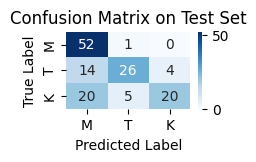

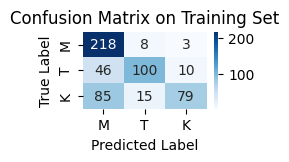

In [154]:
import seaborn as sns

# Vẽ ma trận nhầm lẫn cho tập kiểm tra
plt.figure(figsize=(2, 1))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=list(set(list(y))), yticklabels=list(set(list(y))))
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Vẽ ma trận nhầm lẫn cho tập huấn luyện
plt.figure(figsize=(2, 1))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=list(set(list(y))), yticklabels=list(set(list(y))))
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [156]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Định nghĩa mô hình với tham số C và gamma cần kiểm tra
classifier = SVC(kernel='rbf', C=1, gamma=0.000001, random_state=42)

# Sử dụng StratifiedKFold để đảm bảo phân phối đồng đều giữa các lớp
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation trên tập kiểm tra
cv_scores_test = cross_val_score(classifier, X_test, y_test, cv=cv)
print(f"Cross-Validation Scores on Test Set: {cv_scores_test}")
print(f"Mean Cross-Validation Score on Test Set: {np.mean(cv_scores_test)}")

# Cross-Validation trên tập huấn luyện
cv_scores_train = cross_val_score(classifier, X_train, y_train, cv=cv)
print(f"Cross-Validation Scores on Training Set: {cv_scores_train}")
print(f"Mean Cross-Validation Score on Training Set: {np.mean(cv_scores_train)}")


Cross-Validation Scores on Test Set: [0.51724138 0.51724138 0.46428571 0.53571429 0.57142857]
Mean Cross-Validation Score on Test Set: 0.5211822660098522
Cross-Validation Scores on Training Set: [0.60176991 0.63716814 0.51327434 0.5840708  0.60714286]
Mean Cross-Validation Score on Training Set: 0.588685208596713


In [ ]:
plt.plot(X[0;224:]; label='Good')
plt.xlabel('sample')
plt.ylabel('data')
plt.title('vibration data)
plt.legend()
plt.show()

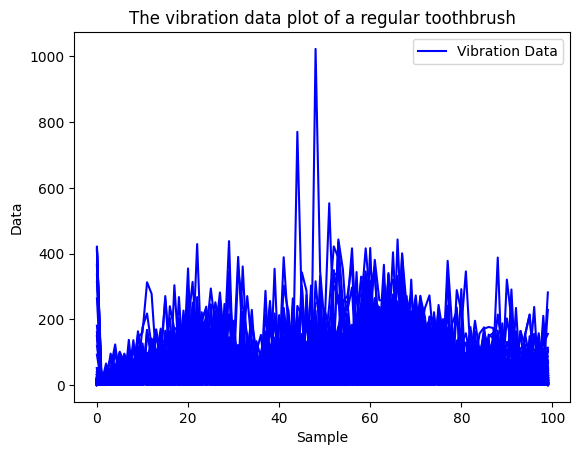

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV
Banchaitot = np.loadtxt('Banchaitot.csv', delimiter=',', dtype=str, encoding='utf-8-sig')

# Lấy dữ liệu từ cột thứ nhất đến cuối cùng (tất cả các cột)
X = Banchaitot[:, 1:].astype(float)

# Vẽ đồ thị
for i in range(X.shape[0]):
    plt.plot(X[i, :], color='blue') 

# Chú thích chỉ một lần với màu chung
plt.plot([], color='blue', label='Vibration Data')
plt.xlabel('Sample')
plt.ylabel('Data')
plt.title('The vibration data plot of a regular toothbrush')
plt.legend()
plt.show()


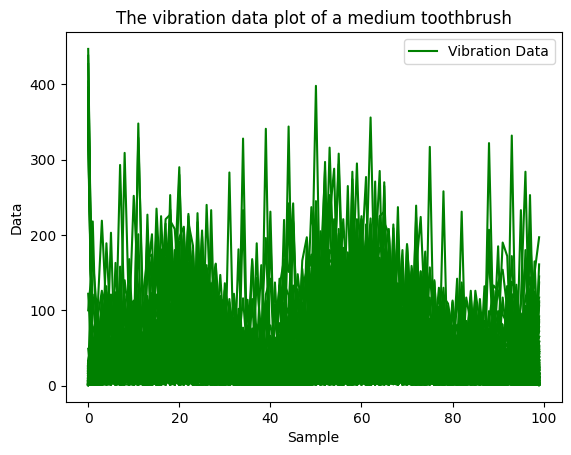

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV
Banchaitot = np.loadtxt('Banchaithuong.csv', delimiter=',', dtype=str, encoding='utf-8-sig')

# Lấy dữ liệu từ cột thứ nhất đến cuối cùng (tất cả các cột)
X = Banchaitot[:, 1:].astype(float)

# Vẽ đồ thị
for i in range(X.shape[0]):
    plt.plot(X[i, :], color='green') 

# Chú thích chỉ một lần với màu chung
plt.plot([], color='green', label='Vibration Data')
plt.xlabel('Sample')
plt.ylabel('Data')
plt.title('The vibration data plot of a medium toothbrush')
plt.legend()
plt.show()


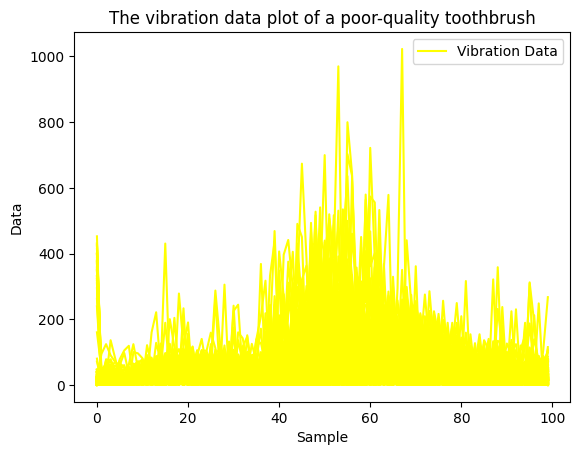

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV
Banchaitot = np.loadtxt('Banchaicu.csv', delimiter=',', dtype=str, encoding='utf-8-sig')

# Lấy dữ liệu từ cột thứ nhất đến cuối cùng (tất cả các cột)
X = Banchaitot[:, 1:].astype(float)

# Vẽ đồ thị
for i in range(X.shape[0]):
    plt.plot(X[i, :], color='yellow') 

# Chú thích chỉ một lần với màu chung
plt.plot([], color='yellow', label='Vibration Data')
plt.xlabel('Sample')
plt.ylabel('Data')
plt.title('The vibration data plot of a poor-quality toothbrush')
plt.legend()
plt.show()
